In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

In [2]:
count = 0
for file in os.listdir("./basketball_reference/game_logs/"):
#     if file.startswith("Curry_Stephen"):
    if file.startswith("Gobert_Rudy"):
        count += 1
        print count, file

1 Curry_Stephen_2013.csv
2 Curry_Stephen_2014.csv
3 Curry_Stephen_2015.csv
4 Curry_Stephen_2016.csv
5 Curry_Stephen_2017.csv


In [3]:
df = pd.DataFrame()
for file in os.listdir("./basketball_reference/game_logs/"):
    if file.startswith("Curry_Stephen"):
        filepath = "./basketball_reference/game_logs/" + file
#         print filepath
        data = pd.read_csv(filepath)
        df = df.append(data)

In [4]:
df.tail()

game        date team  loc  opp   result  gs     mp  fg  fga  \
74    75  2017-04-02  GSW  NaN  WAS  W (+24)   1  35:33  15   22   
75    76  2017-04-04  GSW  NaN  MIN  W (+14)   1  29:53   7   18   
76    77  2017-04-05  GSW    @  PHO   W (+9)   1  35:11  15   25   
77    78  2017-04-10  GSW  NaN  UTA   L (-6)   1  29:57   9   16   
78    79  2017-04-12  GSW  NaN  LAL  W (+15)   1  28:27   6   17   

        ...        drb_pct  trb_pct  ast_pct  stl_pct  blk_pct  tov_pct  \
74      ...            3.1      1.6     36.3      1.3      0.0      4.1   
75      ...            9.4      5.4     44.1      4.9      4.2     13.2   
76      ...           10.5      5.8     61.2      2.6      3.6      9.7   
77      ...           10.0      7.0     26.1      1.7      0.0      5.2   
78      ...           16.5      9.0     43.7      3.3      0.0     24.2   

    usg_pct  off_rtg  def_rtg           Name  
74     28.4      173      116  Stephen Curry  
75     34.0      102      104  Stephen Curry  
76     37.0      141      107  Stephen Curry  
77     30.6      145      115  Stephen Curry  
78     34.9       98       92  Stephen Curry  

[5 rows x 41 columns]

In [5]:
df = df.reset_index()

In [6]:
df.tail()

index  game        date team  loc  opp   result  gs     mp  fg  \
389     74    75  2017-04-02  GSW  NaN  WAS  W (+24)   1  35:33  15   
390     75    76  2017-04-04  GSW  NaN  MIN  W (+14)   1  29:53   7   
391     76    77  2017-04-05  GSW    @  PHO   W (+9)   1  35:11  15   
392     77    78  2017-04-10  GSW  NaN  UTA   L (-6)   1  29:57   9   
393     78    79  2017-04-12  GSW  NaN  LAL  W (+15)   1  28:27   6   

         ...        drb_pct  trb_pct  ast_pct  stl_pct  blk_pct  tov_pct  \
389      ...            3.1      1.6     36.3      1.3      0.0      4.1   
390      ...            9.4      5.4     44.1      4.9      4.2     13.2   
391      ...           10.5      5.8     61.2      2.6      3.6      9.7   
392      ...           10.0      7.0     26.1      1.7      0.0      5.2   
393      ...           16.5      9.0     43.7      3.3      0.0     24.2   

     usg_pct  off_rtg  def_rtg           Name  
389     28.4      173      116  Stephen Curry  
390     34.0      102      104  Stephen Curry  
391     37.0      141      107  Stephen Curry  
392     30.6      145      115  Stephen Curry  
393     34.9       98       92  Stephen Curry  

[5 rows x 42 columns]

In [7]:
del df['index']

In [8]:
df['date'] = pd.to_datetime(df['date'])

In [9]:
df.rename(columns={'loc': 'Home_Game'}, inplace=True)

In [10]:
df['Home_Game'] = [0 if item == "@" else 1 for item in df['Home_Game']]

In [11]:
df['result'] = [item[3:].replace(")","") for item in df['result']]

In [12]:
df['result'] = df['result'].astype(float)

In [13]:
df['mp'] = [0 if pd.isnull(item) else round(float(item.split(":")[0]) + float(item.split(":")[1])/60. , 2) for item in df['mp']]

In [14]:
df = df.dropna(axis=0, how='any')

In [15]:
cols = list(df.columns.values[5:-1])

In [16]:
cols = [col for col in cols if col not in ['fg_pct','fg3_pct','ft_pct']] + ['Home_Game']

In [17]:
X = df[cols]

In [18]:


y = [1 if result > 0 else 0 for result in X['result']]
y = pd.DataFrame(y,columns=["result"])

In [19]:
df.columns.values

array(['game', 'date', 'team', 'Home_Game', 'opp', 'result', 'gs', 'mp',
       'fg', 'fga', 'fg_pct', 'fg3', 'fg3a', 'fg3_pct', 'ft', 'fta',
       'ft_pct', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf',
       'pts', 'gmsc', 'plus_minus', 'ts_pct', 'eFG_pct', 'orb_pct',
       'drb_pct', 'trb_pct', 'ast_pct', 'stl_pct', 'blk_pct', 'tov_pct',
       'usg_pct', 'off_rtg', 'def_rtg', 'Name'], dtype=object)

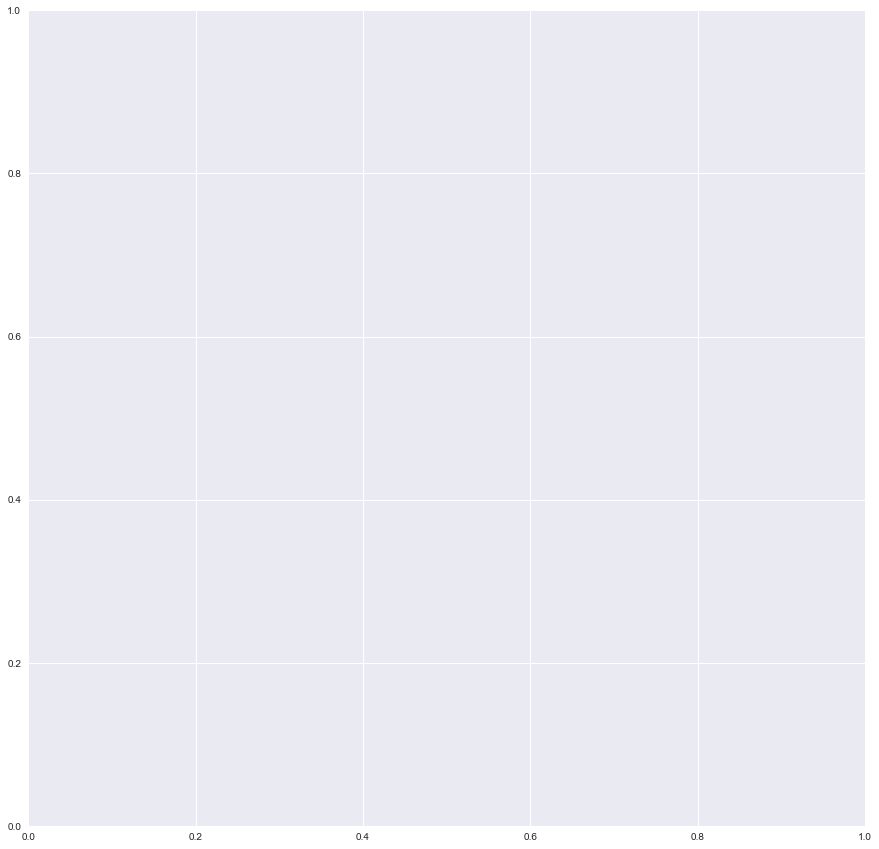

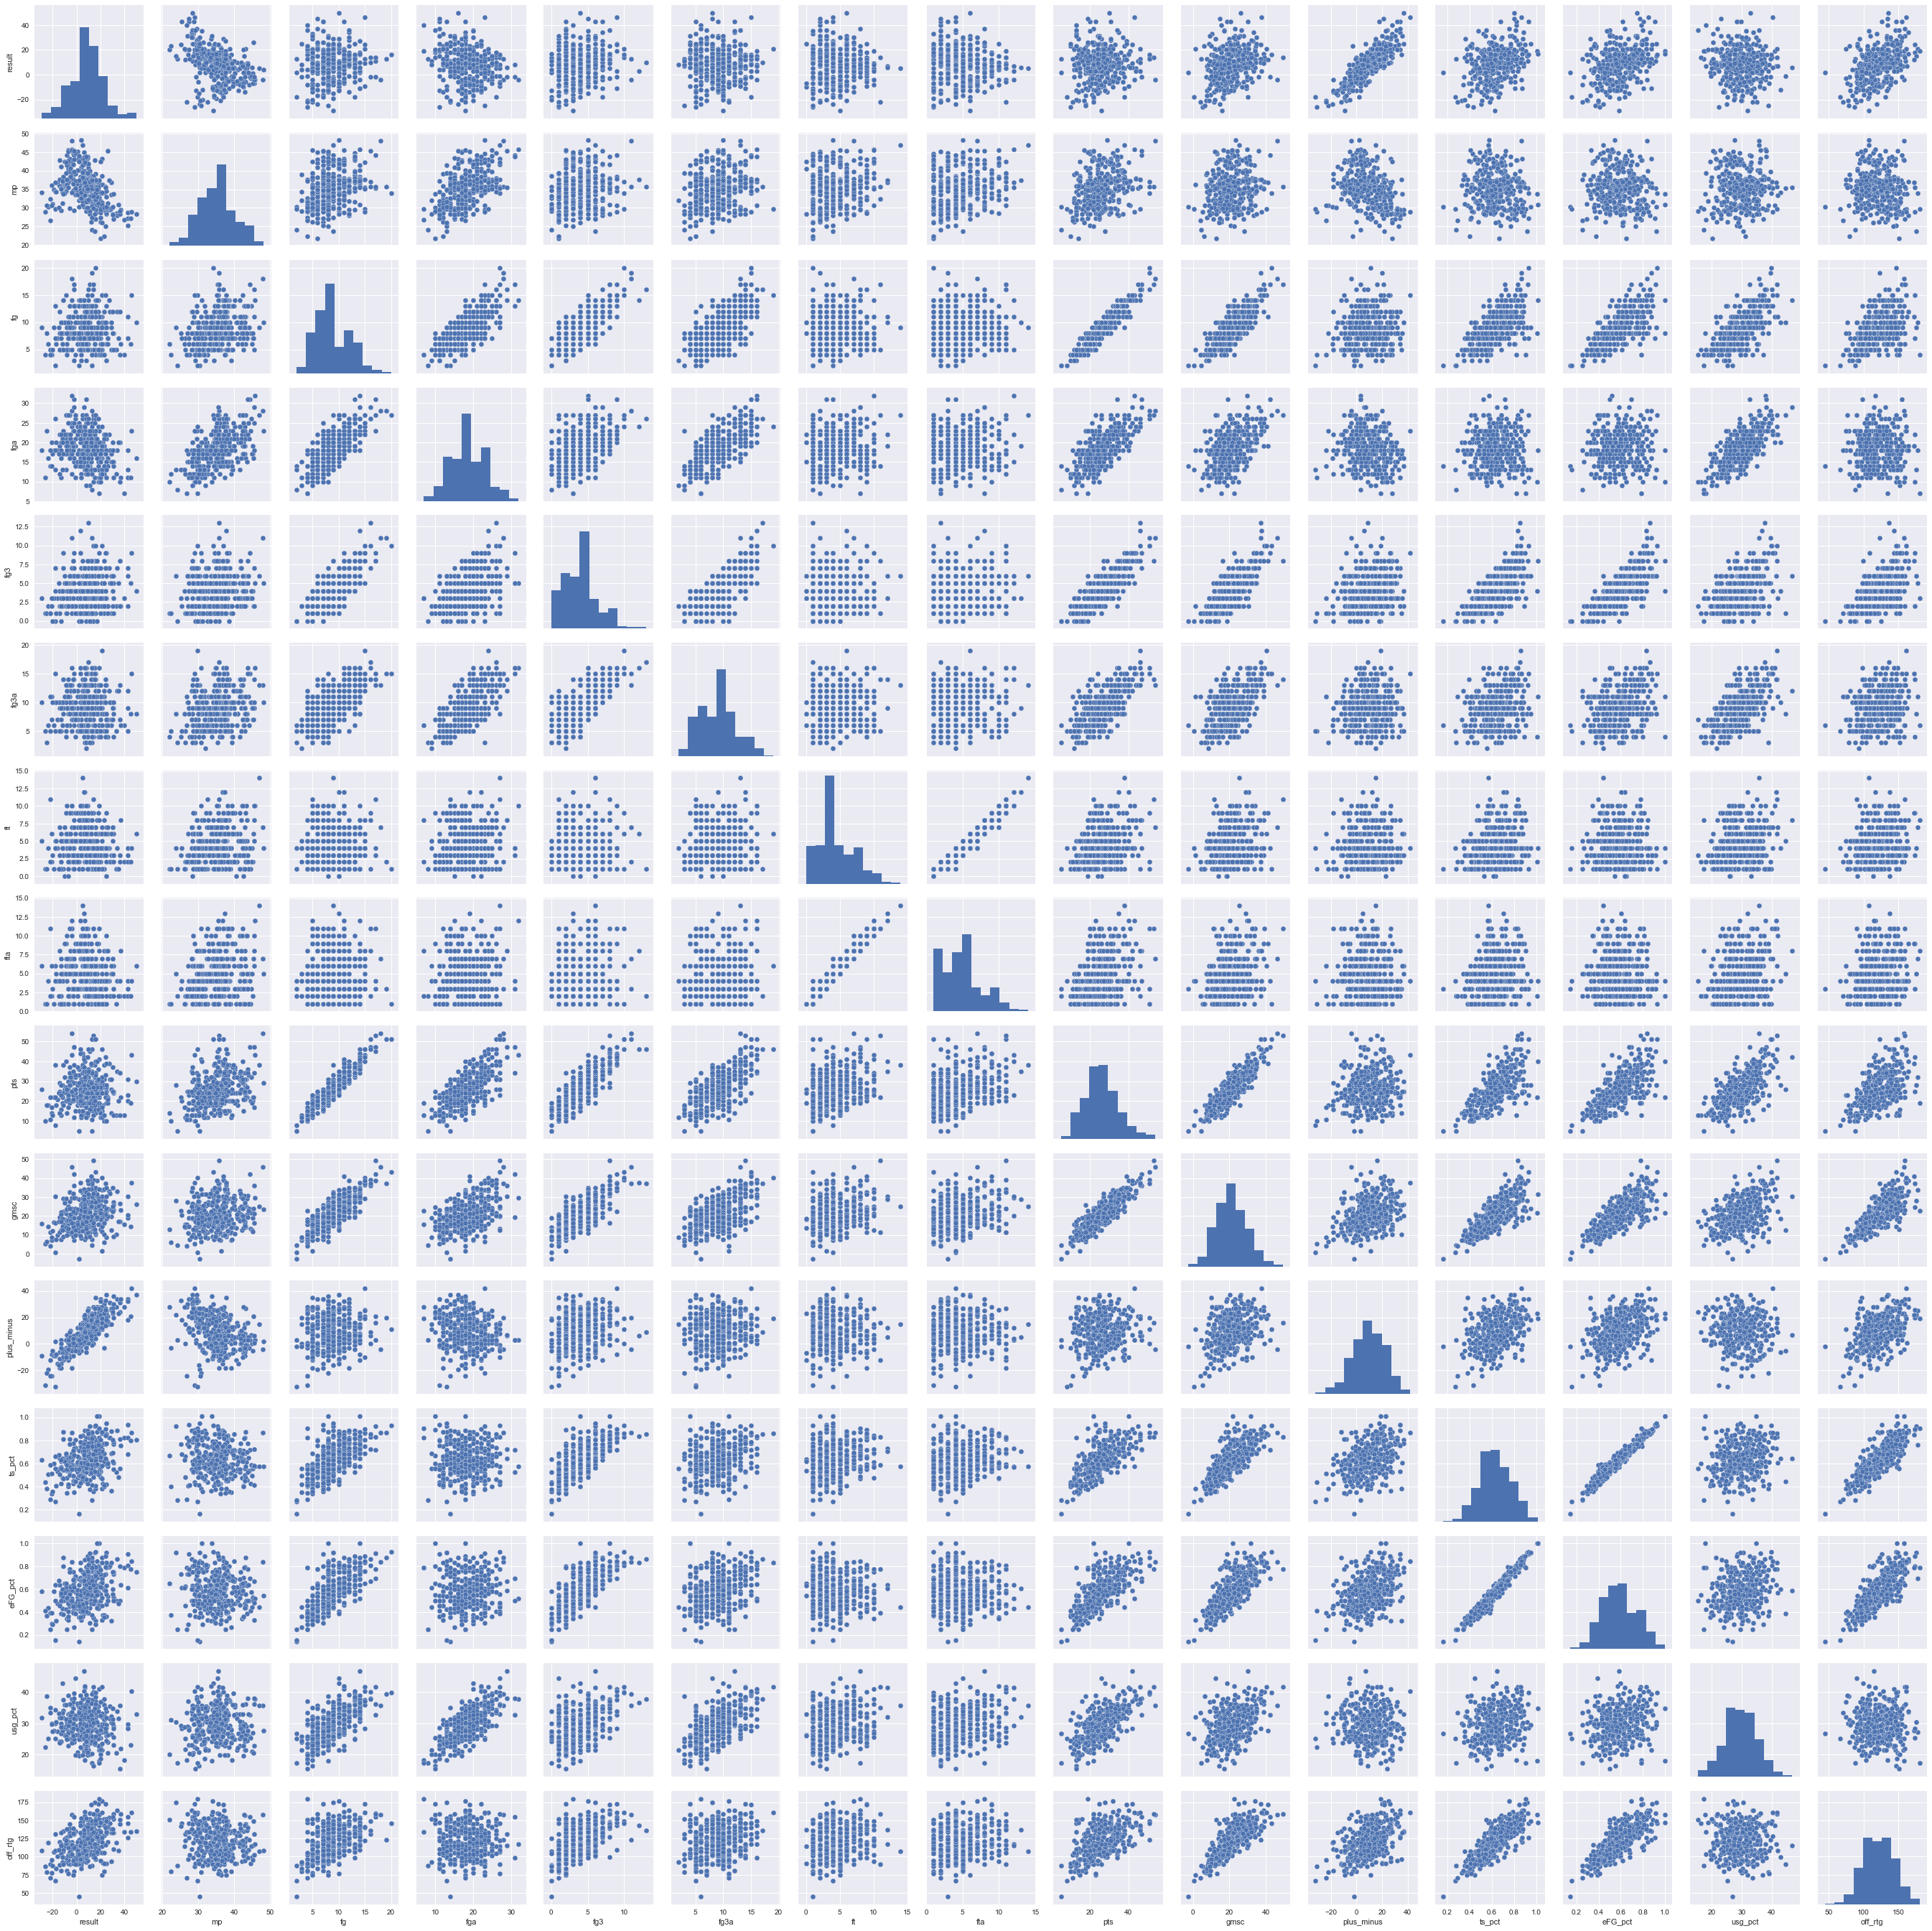

In [20]:
fig, ax = plt.subplots(figsize=(15,15))
sns.pairplot(X[['result', 'mp', 'fg', 'fga', 'fg3', 'fg3a', 'ft', 'fta',\
       'pts', 'gmsc', 'plus_minus', 'ts_pct', 'eFG_pct', 'usg_pct', 'off_rtg']])
plt.show()

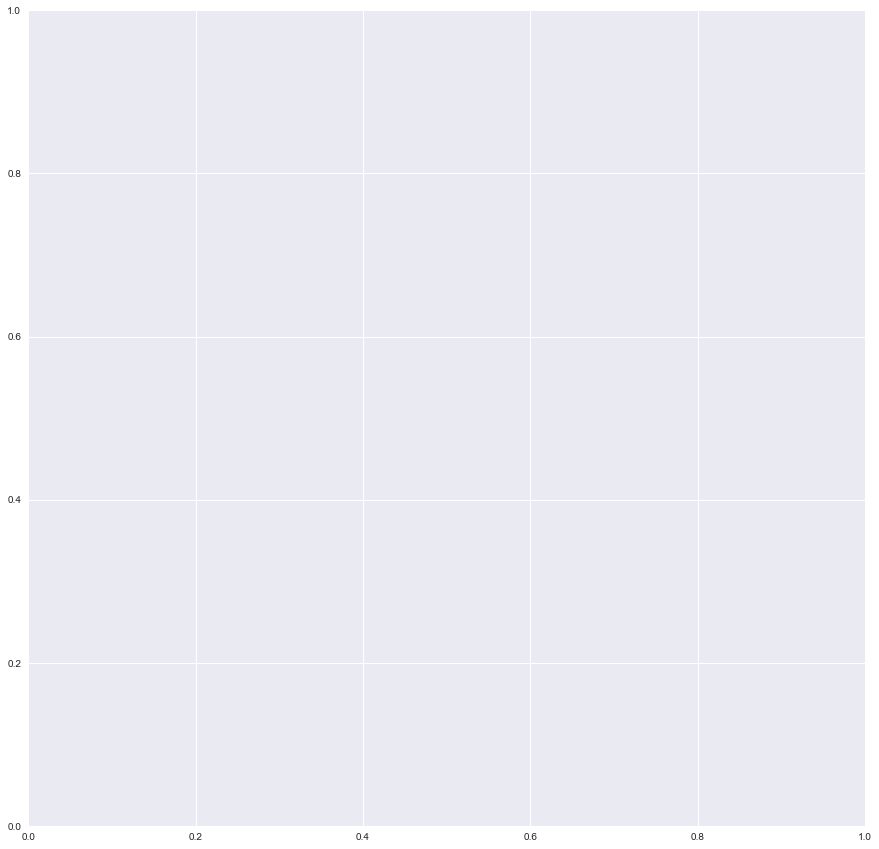

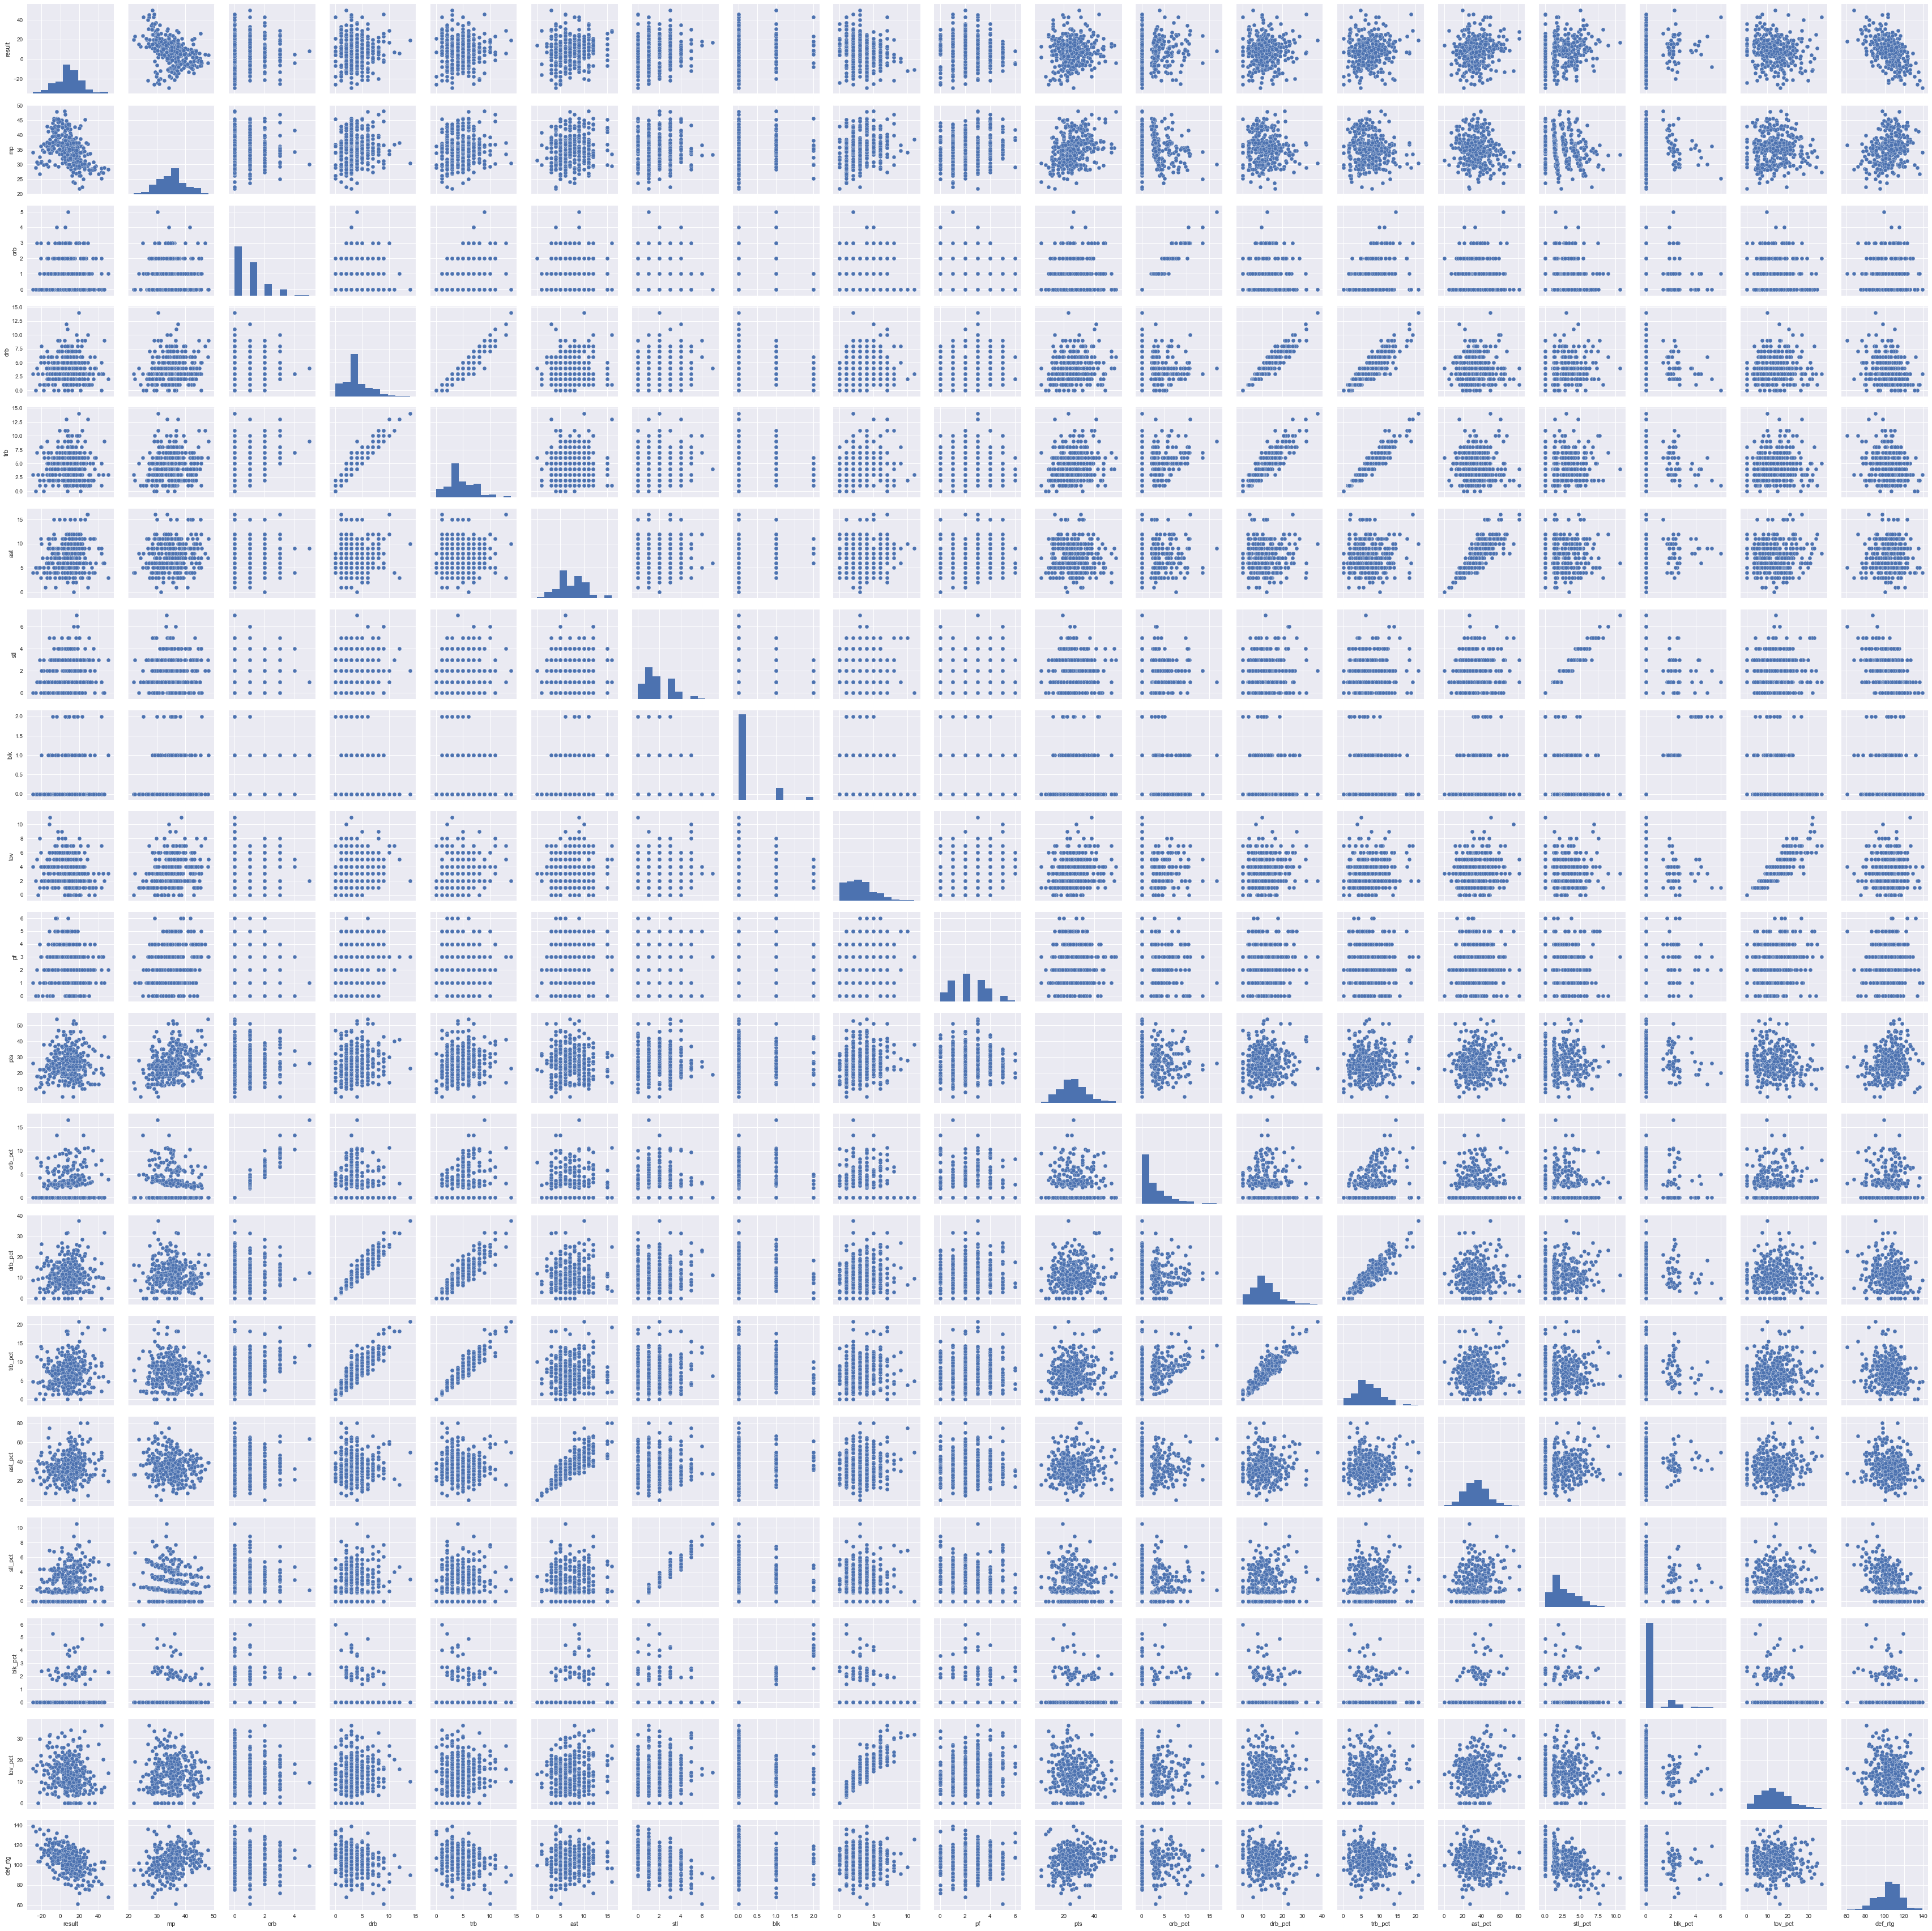

In [21]:
fig, ax = plt.subplots(figsize=(15,15))
sns.pairplot(X[['result', 'mp', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf',\
       'pts', 'orb_pct', 'drb_pct', 'trb_pct', 'ast_pct', 'stl_pct', 'blk_pct', 'tov_pct', 'def_rtg']])
plt.show()

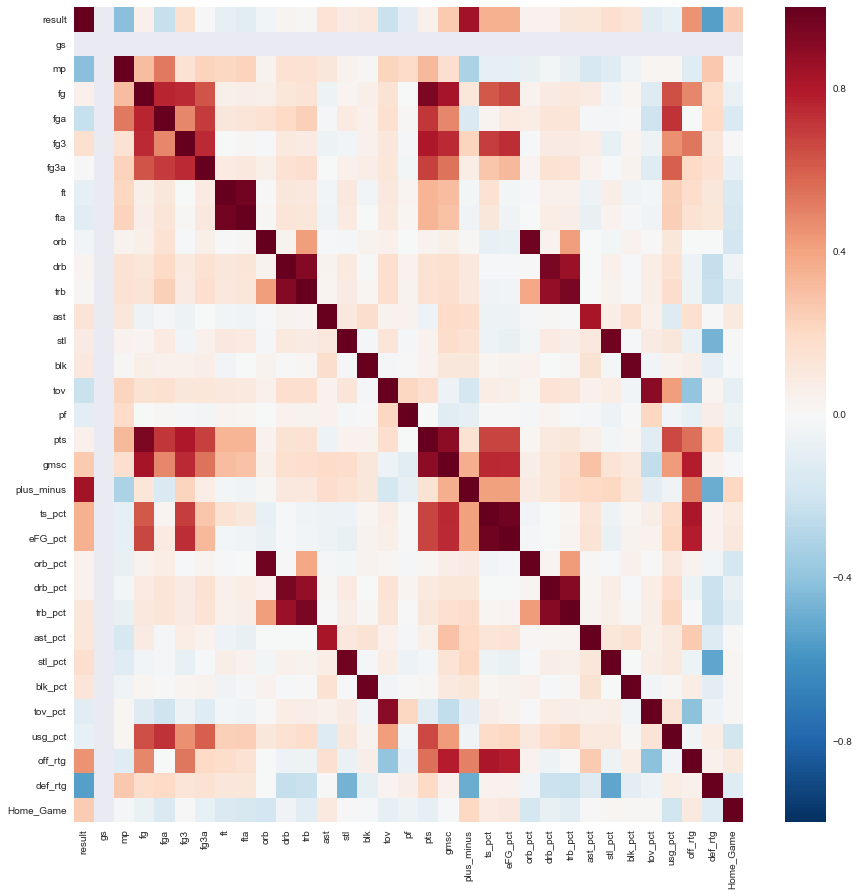

In [22]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(X.corr(), ax=ax)

In [23]:
X.corr()['result'].sort_values(ascending=False)

result        1.000000
plus_minus    0.840993
off_rtg       0.452992
eFG_pct       0.357758
ts_pct        0.354760
gmsc          0.261127
Home_Game     0.255118
stl_pct       0.165270
fg3           0.163458
ast           0.133950
blk_pct       0.127846
ast_pct       0.121802
trb_pct       0.110013
blk           0.109211
stl           0.085930
pts           0.051084
fg            0.047487
drb_pct       0.046237
orb_pct       0.039900
drb           0.028177
trb           0.010371
fg3a          0.001788
orb          -0.039054
usg_pct      -0.081476
ft           -0.092081
pf           -0.106642
fta          -0.109430
tov_pct      -0.114992
tov          -0.218990
fga          -0.230449
mp           -0.419651
def_rtg      -0.550279
gs                 NaN
Name: result, dtype: float64

In [24]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Xs = ss.fit_transform(X)
Xs = pd.DataFrame(Xs, columns=cols)

In [25]:
del X['result']
del X['gs']

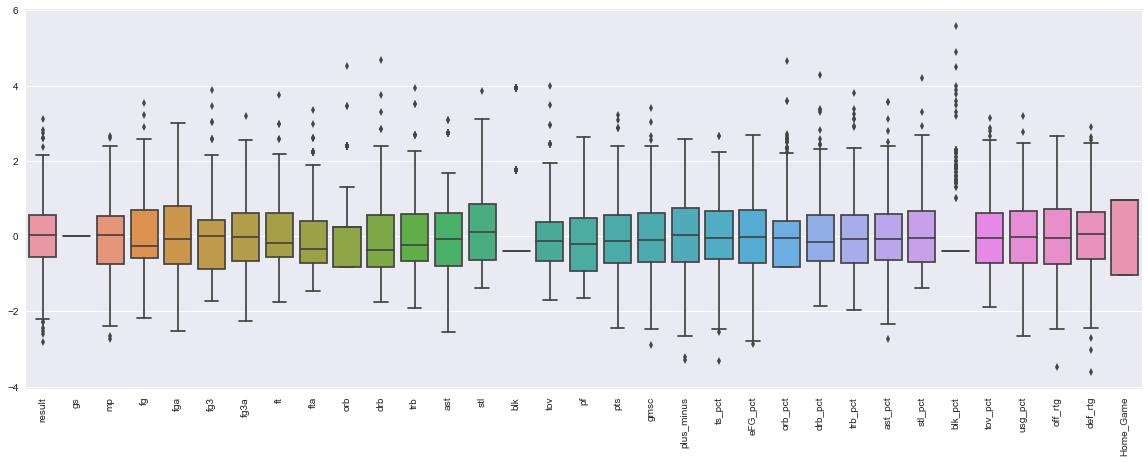

In [26]:
fig = plt.figure(figsize=(20,7))
ax = fig.gca()
ax = sns.boxplot(data=Xs, ax=ax)#, notch=True)
ax.set_xticklabels(cols, rotation=90)
plt.show()

In [27]:
# checking for nan's
count = 0
for col in Xs.columns:
    for i, row in enumerate(Xs[col]):
        if np.isnan(row):
            count += 1
            print i, col, row
print count

0


In [2]:
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV